<a href="https://colab.research.google.com/github/jvataidee/PesquisaOperacional/blob/master/maxloglihood_portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Maximum Likelihood Estimation - MLE


In [134]:
!pip install yfinance -q

In [135]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import norm

## Baixando ações da bolsa 

In [136]:
tickers = ['AAPL', 'AMZN', 'GOOGL', 'TSLA', 'META']
end_date = pd.Timestamp.now()
start_date = end_date - pd.DateOffset(years=10)
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
data.head()

[*********************100%***********************]  5 of 5 completed


,AAPL,AMZN,GOOGL,META,TSLA
Date,,,,,
2013-03-25,14.299473,12.8010,20.261261,25.129999,2.502000
2013-03-26,14.224212,13.0155,20.330832,25.209999,2.524000
2013-03-27,13.944746,13.2650,20.086588,26.090000,2.544000
2013-03-28,13.654180,13.3245,19.874624,25.580000,2.526000
2013-04-01,13.230053,13.0805,20.049801,25.530001,2.928667


In [137]:
ticker_colors = {
    'AAPL': 'black',   # Apple logo color
    'AMZN': 'darkblue', # Amazon logo color
    'GOOGL': 'darkred', # Google logo color
    'TSLA': 'red',    # Tesla logo color
    'META': 'royalblue'   # Meta Platforms logo color (formerly Facebook)
    }

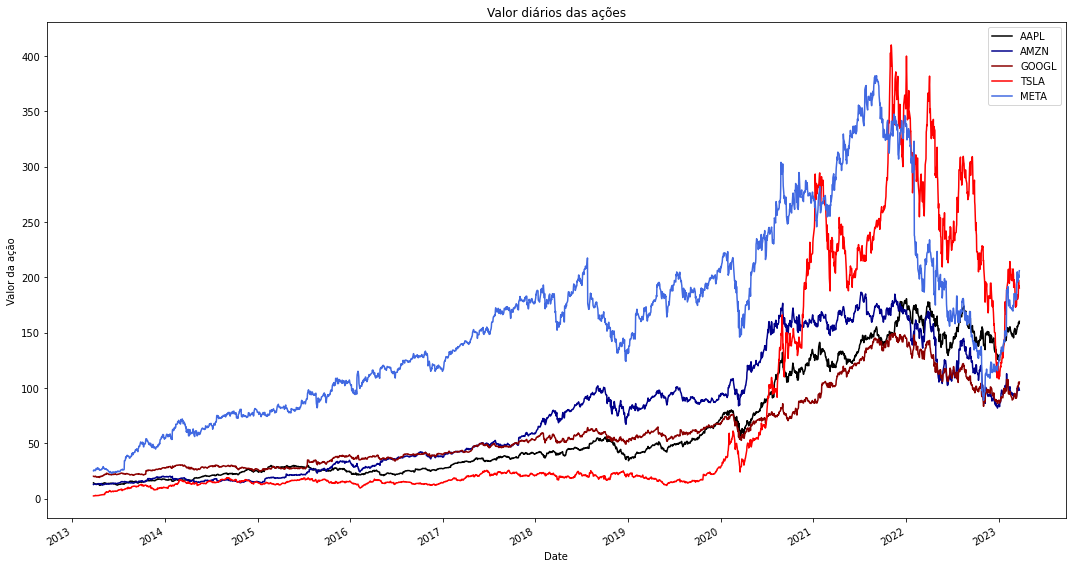

In [138]:
fig, ax = plt.subplots(figsize=(15, 8))

for ticker in tickers:
    data[ticker].plot(ax=ax, label=ticker, color=ticker_colors[ticker])

ax.set_ylabel("Valor da ação")
ax.set_title("Valor diários das ações")
ax.legend()
plt.tight_layout()
plt.show()

## Calculando Retornos

In [139]:
# Calcular retornos diários
returns = data.pct_change().dropna()
returns.head()

,AAPL,AMZN,GOOGL,META,TSLA
Date,,,,,
2013-03-26,-0.005263,0.016757,0.003434,0.003183,0.008793
2013-03-27,-0.019647,0.019169,-0.012013,0.034907,0.007924
2013-03-28,-0.020837,0.004485,-0.010552,-0.019548,-0.007075
2013-04-01,-0.031062,-0.018312,0.008814,-0.001955,0.159409
2013-04-02,0.002052,0.006537,0.014790,-0.004309,0.009333


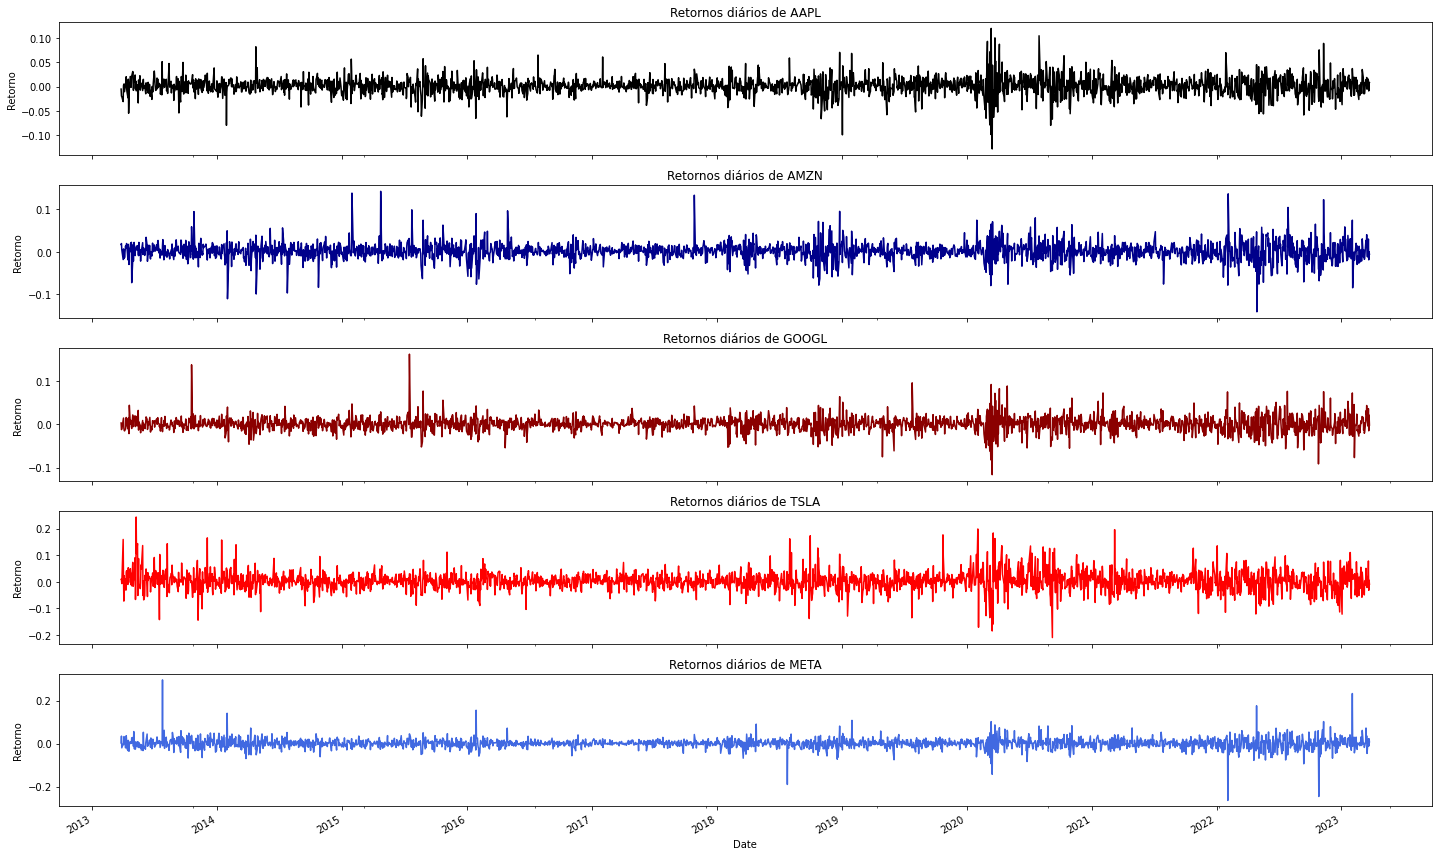

In [140]:
fig, axes = plt.subplots(nrows=len(tickers), ncols=1, figsize=(20, 12), sharex=True)

for i, ticker in enumerate(tickers):
    returns[ticker].plot(ax=axes[i], title=f'Retornos diários de {ticker}', color=ticker_colors[ticker])
    axes[i].set_ylabel('Retorno')

plt.tight_layout()
plt.show()


In [141]:
def neg_log_likelihood(params, data):
    mu, sigma = params
    return -np.sum(norm.logpdf(data, mu, sigma))

In [142]:
# Estimar os parâmetros MLE para cada ticker
params = []
for ticker in tickers:
    ret = returns[ticker]
    init_params = np.array([0, 1])
    result = minimize(neg_log_likelihood, init_params, args=(ret), bounds=((None, None), (1e-5, None)))
    params.append(result.x)

In [143]:
# Calcular a probabilidade de sucesso e risco
results = []
for i, ticker in enumerate(tickers):
    mu, sigma = params[i]
    success_prob = norm.cdf(0, mu, sigma)
    risk = 1 - success_prob
    results.append((ticker, success_prob, risk))

In [144]:
# Ordenar os resultados com base na maior probabilidade de sucesso
results.sort(key=lambda x: x[1], reverse=True)

# Exibir resultados
print("Ticker | Probabilidade de Sucesso | Risco")
for ticker, success_prob, risk in results:
    print(f"{ticker:5} | {success_prob * 100:21.2f}% | {risk * 100:5.2f}%")

Ticker | Probabilidade de Sucesso | Risco
GOOGL |                 48.15% | 51.85%
META  |                 48.15% | 51.85%
AMZN  |                 48.03% | 51.97%
AAPL  |                 47.52% | 52.48%
TSLA  |                 47.39% | 52.61%
